## 1. KNN

### uniform

In [1]:
# 3장  KNN
import seaborn as sns # seaborn을 불러오고 SNS로 축약함.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
print(iris.head()) # 최초의 5개의 관측치를 print

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
print(iris.shape) # iris data의 행과 열의 수

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
print(X.shape)

y=iris['species']               # 'species'열을 lavel y를 정의함.

(150, 5)
(150, 4)


In [3]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
import numpy as np # numpy를 불러옴
classle=LabelEncoder() 
y=classle.fit_transform(iris['species'].values) # species 열의 문자열은 categorical 값으로 전환
print('species labels:', np.unique(y)) # 중복되는 y 값을 하나로 정리하여 print

species labels: [0 1 2]


In [28]:
from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, stratify=y)   # x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [37]:
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기
knn=KNeighborsClassifier(n_neighbors=4,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_train,y_train) #모델 fitting과정

KNeighborsClassifier(n_neighbors=4)

In [38]:
y_train_pred=knn.predict(X_train) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 1
Misclassified test samples: 4


In [39]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) 

0.9111111111111111


In [40]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)

[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


### Weighted KNN

In [44]:
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기
knn=KNeighborsClassifier(n_neighbors=4,p=2, weights="distance") #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_train,y_train) #모델 fitting과정

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [45]:
y_train_pred=knn.predict(X_train) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 0
Misclassified test samples: 3


In [46]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) 

0.9333333333333333


In [47]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


weight="distance" 의 경우 분류의 정확도가 0.93 'uniform'으로 준 경우 0.91로 거리가 정확도가 더 높아 합리적이다.

## 2. KDE

### (1)  bandwidth 조절

In [49]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.reshape(-1, 1) # reshape

Text(0.5, 1.0, 'bandwidth=0.05')

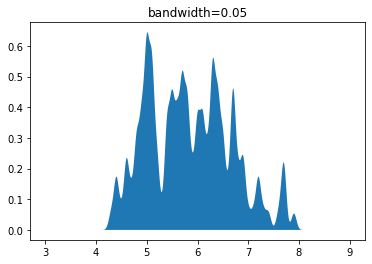

In [51]:
# bandwidth=0.05
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.05, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('bandwidth=0.05')

Text(0.5, 1.0, 'bandwidth=0.2')

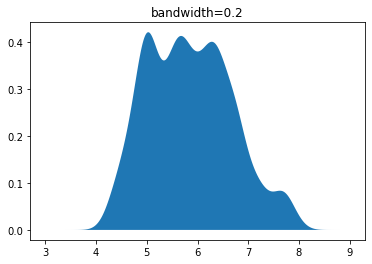

In [59]:
# bandwidth=0.2
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('bandwidth=0.2')

Text(0.5, 1.0, 'bandwidth=0.5')

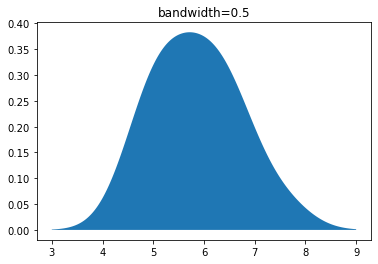

In [61]:
# bandwidth=0.5
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.5, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('bandwidth=0.5')

Text(0.5, 1.0, 'bandwidth=5')

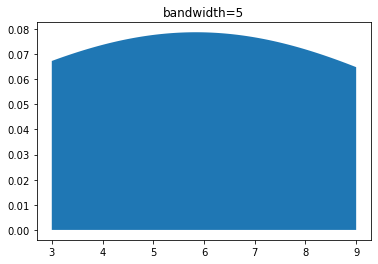

In [68]:
# bandwidth=5
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=5, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('bandwidth=5')

### (2) kernel

Text(0.5, 1.0, 'gaussian')

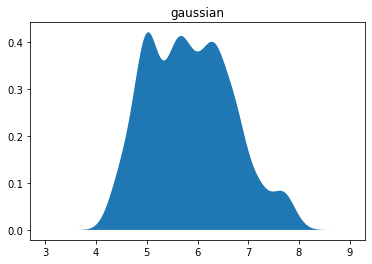

In [109]:
# kernel='gaussian'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('gaussian')

Text(0.5, 1.0, 'tophat')

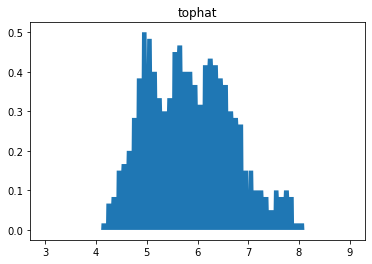

In [110]:
# kernel = 'tophat'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='tophat')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('tophat')

Text(0.5, 1.0, 'epanechnikov')

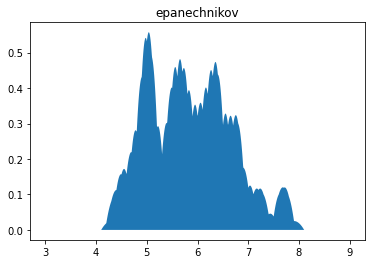

In [114]:
# kernel = 'epanechnikov'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='epanechnikov')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('epanechnikov')

Text(0.5, 1.0, 'exponential')

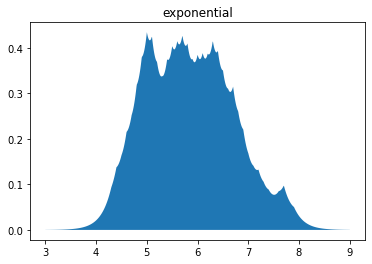

In [113]:
# kernel = 'exponential'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='exponential')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('exponential')

Text(0.5, 1.0, 'linear')

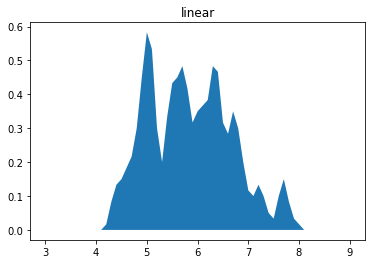

In [112]:
# kernel = 'linear'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='linear')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('linear')

Text(0.5, 1.0, 'cosine')

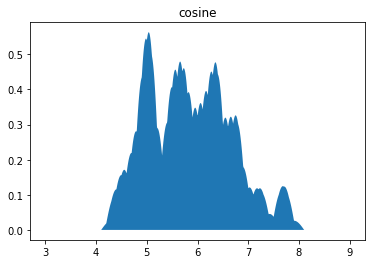

In [111]:
# kernel = 'cosine'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='cosine')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) # 3부터 9를 1000개로 나누기
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 모델하에서 sample의 log probability 계산

# 그래프 그리기
plt.fill_between(xx_d, np.exp(logprob))
plt.title('cosine')

비교하기

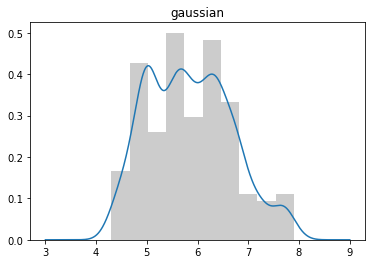

In [115]:
# kernel='gaussian'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

# 그래프 그리기
plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('gaussian')

plt.show()

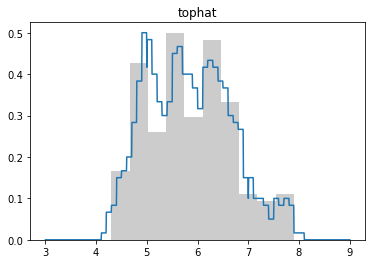

In [119]:
# kernel='tophat'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='tophat')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

# 그래프 그리기
plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('tophat')

plt.show()

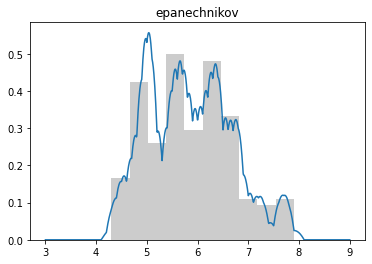

In [106]:
# kernel = 'epanechnikov'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='epanechnikov')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('epanechnikov')

plt.show()

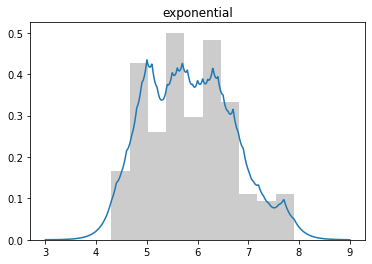

In [118]:
# kernel='exponential'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='exponential')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

# 그래프 그리기
plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('exponential')

plt.show()

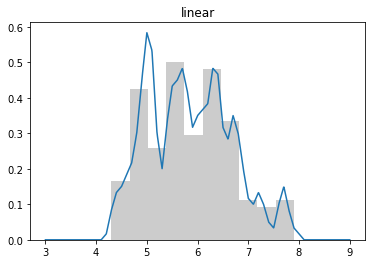

In [117]:
# kernel='linear'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='linear')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

# 그래프 그리기
plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('linear')

plt.show()

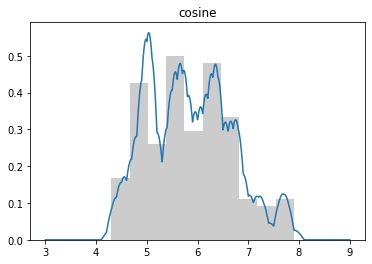

In [116]:
# kernel='cosine'
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='cosine')
kd.fit(xx)

xx_d = np.linspace(3, 9, 1000) 
logprob=kd.score_samples(xx_d.reshape(-1, 1)) 

# 그래프 그리기
plt.plot(xx_d, np.exp(logprob))
plt.hist(xx, density=True, color = 'gray', alpha=0.4)

plt.title('cosine')

plt.show()